# 环境配置
导入本节中实验所需的包或模块，其中的matplotlib包可用于作图，且设置成嵌入显示。

In [14]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

## 生成数据集
样本数为1000，特征数为2，真实权重$\mathbf w=[2,-3.4]^T$，偏执项$b=3$，随机噪声项$\epsilon$。即：
$$Y=wX+b+\epsilon$$

In [15]:
cnt_inputs = 2
cnt_samples = 1000
true_w = [2, -3.4]
true_b = 3
x = torch.rand(cnt_samples, cnt_inputs, dtype = torch.float32)
y = true_w[0] * x[:,0] + true_w[1] * x[:,1] + true_b
y += torch.tensor(np.random.normal(0, 0.01, y.size()), dtype = torch.float32)

In [16]:
print(x[0], y[0])

tensor([0.7886, 0.6083]) tensor(2.5189)


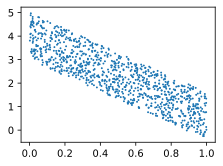

In [17]:
def set_figsize(figsize=(3.5, 2.5)):
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import * 

set_figsize()
plt.scatter(x[:, 1].numpy(), y.numpy(), 1);

In [18]:
def data_iter(batch_size, x, y):
    cnt_samples = len(x)
    indices = list(range(cnt_samples))
    random.shuffle(indices)
    for i in range(0, cnt_samples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, cnt_samples)])
        yield x.index_select(0, j), y.index_select(0, j)

In [19]:
batch_size = 10
for X, Y in data_iter(batch_size, x, y):
    print(X, Y)
    break

tensor([[0.2670, 0.0642],
        [0.0954, 0.5305],
        [0.8261, 0.3144],
        [0.2160, 0.2848],
        [0.7629, 0.3542],
        [0.4422, 0.6121],
        [0.4030, 0.4775],
        [0.5455, 0.3869],
        [0.8722, 0.7173],
        [0.7911, 0.0950]]) tensor([3.3291, 1.4110, 3.5896, 2.4712, 3.3278, 1.8095, 2.1899, 2.7780, 2.3011,
        4.2398])


In [20]:
w = torch.tensor(np.random.normal(0, 0.01, (cnt_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)


In [21]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [22]:
def linreg(X, w, b):
    return torch.mm(X, w) + b


In [23]:
def squared_loss(y_hat, y):
    return (y_hat-y.view(y_hat.size())) ** 2 / 2
    

In [24]:
def sgd(params, lr, batch_size):
    for para in params:
        para.data -= lr * para.grad / batch_size

In [25]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,Y in data_iter(batch_size=batch_size, x=x, y=y):
        l = loss(net(x,w,b),Y).sum()
        l.backward()
        sgd([w,b], lr, batch_size=batch_size)

        w.grad.data.zero_()
        b.grad_data.zero_()
    train_l = loss(net(x,w,b),y)
    print("epoch %d, loss %f"%(epoch+1, train_l.mean.item()))

RuntimeError: shape '[1000, 1]' is invalid for input of size 10